In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
SIMILARITY_THRESHOLD=0.5

In [5]:
def load_similarity_df(video_name, vos_method):
    similarity = pd.read_json(f"similarity-out/{vos_method}/{video_name}/{video_name}.json", orient="records")
    similarity["frame_id"] = pd.to_numeric(similarity["frame_id"])
    similarity["structural-similarity"] = similarity.metrics.apply(pd.Series)
    similarity["VOS-method"] = vos_method
    del similarity["metrics"]
    return similarity

In [6]:
def extract_similarity_sumary(similarity_list):
    return {
        "min": np.min(similarity_list),
        "max": np.max(similarity_list),
        "mean": np.mean(similarity_list), 
        "median": np.median(similarity_list),
        "diff-rate": np.mean([1 if s < SIMILARITY_THRESHOLD else 0 for s in similarity_list])
    }

In [7]:
def apply_sumary_function(df):
    similarity_sumary = df["structural-similarity"].apply(extract_similarity_sumary).apply(pd.Series)
    return pd.concat([df,similarity_sumary], axis=1)

-----------
# Load metrics

The code below loads the metrics as DataFrames generated by the ml-vide-metrics tool

In [8]:
video_name = "swing"

In [9]:
similarity_osvos = load_similarity_df(video_name, "OSVOS")

In [10]:
similarity_premvos = load_similarity_df(video_name, "PREMVOS")

# Summary metrics

Since the metric of Structural Similarity returns a list of similarity values (one value by image region), in this step we extract some information about those values.

In [11]:
similarity_sumary_osvos = apply_sumary_function(similarity_osvos)

In [12]:
similarity_sumary_premvos = apply_sumary_function(similarity_premvos)

In [13]:
similarity = pd.concat([similarity_sumary_osvos, similarity_sumary_premvos])

In [16]:
similarity.head()

,video_name,frame_id,structural-similarity,VOS-method,min,max,mean,median,diff-rate
0,swing,1,"[0.9999587431890261, 0.9998072279249881, 0.999...",OSVOS,-0.422812,1.0,0.925222,0.999803,0.069336
1,swing,2,"[0.9999123142638121, 0.9999345004710071, 0.999...",OSVOS,-0.385700,1.0,0.930723,0.999832,0.064453
2,swing,3,"[0.9998833063310361, 0.9999576976235831, 0.999...",OSVOS,-0.388155,1.0,0.937116,0.999892,0.056641
3,swing,4,"[0.9999932075265081, 0.9999604998472421, 0.999...",OSVOS,-0.473435,1.0,0.941694,0.999874,0.058594
4,swing,5,"[0.9999778247855751, 0.9999628451044441, 0.999...",OSVOS,-0.457485,1.0,0.946468,0.999811,0.050781


# Plot
In this step we will plot the rate of regions in the image that are bellow a similarity threshold.

With this plot we can analyze two different methods to perform the same task when they are compared with an reference value.

[Text(0, 0.5, 'rate of different regions'), Text(0.5, 0, 'frame id')]

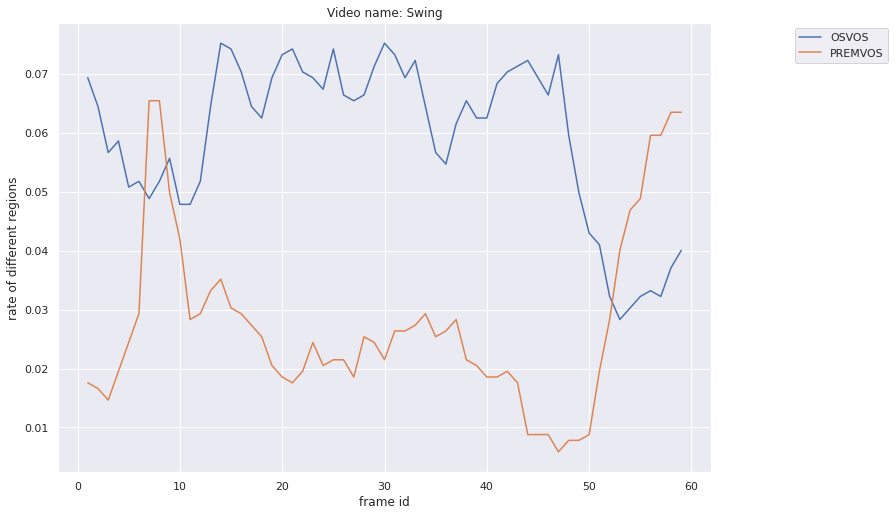

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


ax = sns.lineplot(x="frame_id",
    y="diff-rate",
    hue="VOS-method",
    data=similarity,
    legend='full')
ax.set_title('Video name: Swing')
ax.legend(bbox_to_anchor=(1.28, 1))
ax.set(ylabel='rate of different regions', xlabel='frame id')